<a href="https://colab.research.google.com/github/Haseeb227/Gradient_Descent/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
%matplotlib notebook
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


In [3]:
x,y = make_regression(n_samples=100,n_features = 1, n_targets=1 ,noise = 20, random_state = 13)

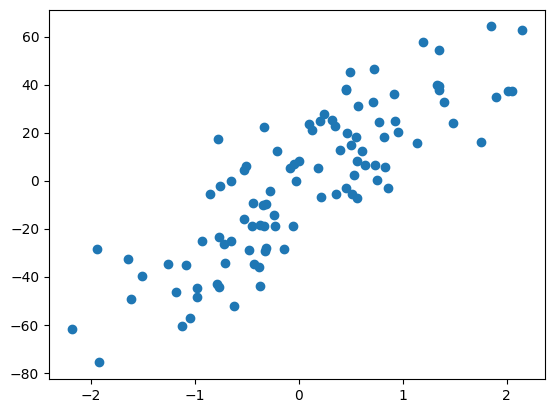

In [4]:
plt.scatter(x,y)
plt.show()

# Linear Regression

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
lr = LinearRegression()

In [9]:
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [13]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)


0.6345158782661012

# Greadient Descent (M and B)

In [23]:
class GDRegressor:

  def __init__(self,learning_rate,epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,x,y):
    # calculate the b using GD
    for i in range(self.epochs):
      loss_slope_b = -2*np.sum(y - self.m*x.ravel() - self.b)
      loss_slope_m = -2*np.sum((y - self.m*x.ravel()- self.b)*x.ravel())

      self.b = self.b - (self.lr*loss_slope_b)
      self.m = self.m - (self.lr*loss_slope_m)
    print(self.m,self.b)

  def predict(self,x):
    return self.m*x + self.b


In [24]:
gd = GDRegressor(0.001,70)

In [25]:
gd.fit(x_train,y_train)

28.12742738603652 -2.272149769092331


In [26]:
y_pred = gd.predict(x_test)
r2_score(y_test,y_pred)

0.6345101396779722

# Visualization

In [28]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=40,random_state=23)

In [29]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

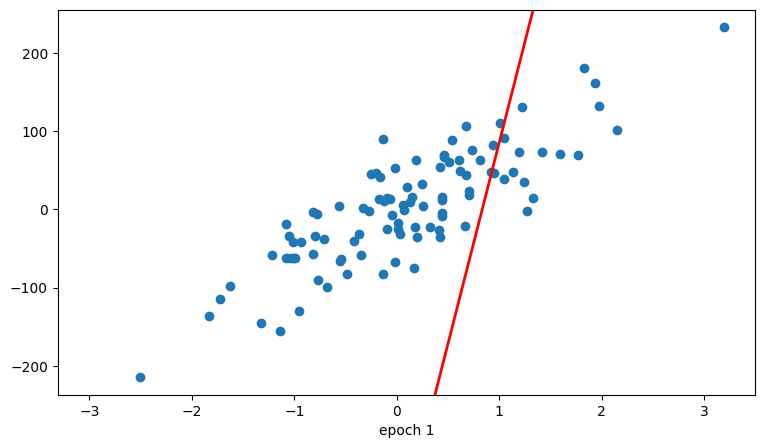

In [30]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation4.gif"
#writergif = animation.PillowWriter(fps=2)
#anim.save(f, writer=writergif)

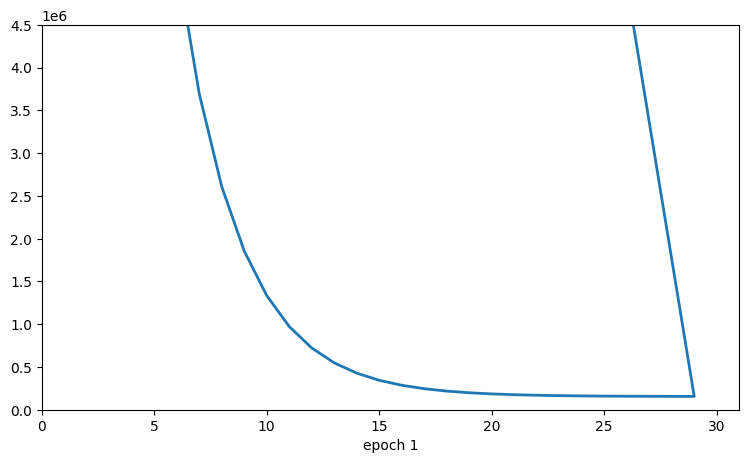

In [31]:
# Cost function
# creating a blank window
# for the animation
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(0, 31), ylim =(0, 4500000))

line, = axis.plot([], [], lw = 2)

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i])
    ydata.append(all_cost[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation5.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)

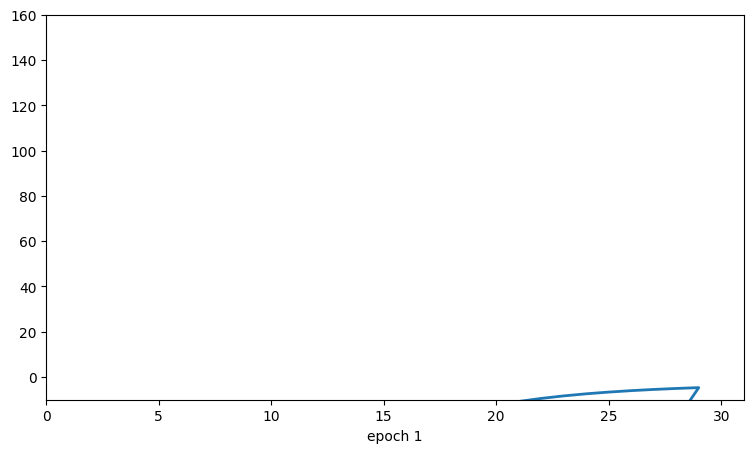

In [32]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(0, 31), ylim =(-10, 160))

line, = axis.plot([], [], lw = 2)

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i])
    ydata.append(all_b[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation6.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)

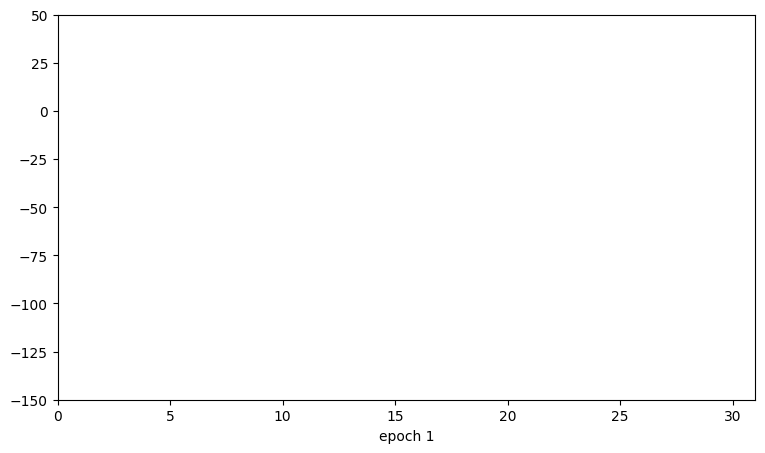

In [33]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(0, 31), ylim =(-150, 50))

line, = axis.plot([], [], lw = 2)

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i])
    ydata.append(all_m[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation7.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)